In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Basic data cleaning

# Read the file
df = pd.read_csv(r"C:\Users\DELL\Desktop\FIN3080\HW\HW1\Python_version\raw_data\problem3_data.csv")

# Rename the columns
df.columns = ["stock_code", "date", "revenue", "ROE"]

# Time formatting
df["date"] = pd.to_datetime(df["date"])
df["year"] = df["date"].dt.year

df = df[(df["year"] >= 2010) & (df["year"] <= 2020)]


In [ ]:
# Calculate the annual median values for ROE.

# Drops any row in df that has missing values in either the "ROE" or "revenue" columns
# inplace = True: directly make the change to the existing object — don't return a new one.
df.dropna(subset = ["ROE", "revenue"], inplace = True)

# Groups the data by stock_code.
# Filters to keep the firms whose "years" values exactly match the full set {2010, ..., 2020}
complete_firms = df.groupby("stock_code").filter(lambda x: set(x['year']) == set(range(2010, 2021)))

# Sorts the df so that for each company (stock_code), the rows appear in chronological order (year)
complete_firms.sort_values(by = ["stock_code", "year"], inplace = True)
roe_median = complete_firms.groupby("year")["ROE"].median()

# Percentage
complete_firms["revenue_growth"] = complete_firms.groupby("stock_code")["revenue"].pct_change().fillna(0) * 100


In [ ]:
years = list(range(2010, 2021))
firmList = set(complete_firms["stock_code"].unique())

# Initialization
cons_above_roe = firmList.copy()
cons_above_rev_growth = firmList.copy()
pct_above_median_roe = [50]  # Initialize with 50% for the first year
pct_above_growth_rate = [50]

for year in years[1:]:
    # Loop over years starting from 2011 (2010 is the baseline)
    median_roe_for_year = roe_median.loc[year]
    median_growth_rate_for_year = complete_firms[complete_firms["year"] == year]["revenue_growth"].median()

    # This collects all firm stock_codes that have ROE above the median in that year
    current_above_roe = set(complete_firms[(complete_firms["year"] == year) & (complete_firms["ROE"] > median_roe_for_year)]["stock_code"])
    # This collects all firm stock_codes that have revenue growth above the median in that year.
    current_above_rev_growth = set(complete_firms[(complete_firms["year"] == year) & (complete_firms['revenue_growth'] > median_growth_rate_for_year)]['stock_code'])

    # Set intersection and assignment
    cons_above_roe &= current_above_roe
    cons_above_rev_growth &= current_above_rev_growth

    # For each year, we calculate the percentage of firms above median ROE and above median revenue growth rate.
    pct_above_median_roe.append(len(cons_above_roe) / len(firmList) * 100)
    pct_above_growth_rate.append(len(cons_above_rev_growth) / len(firmList) * 100)


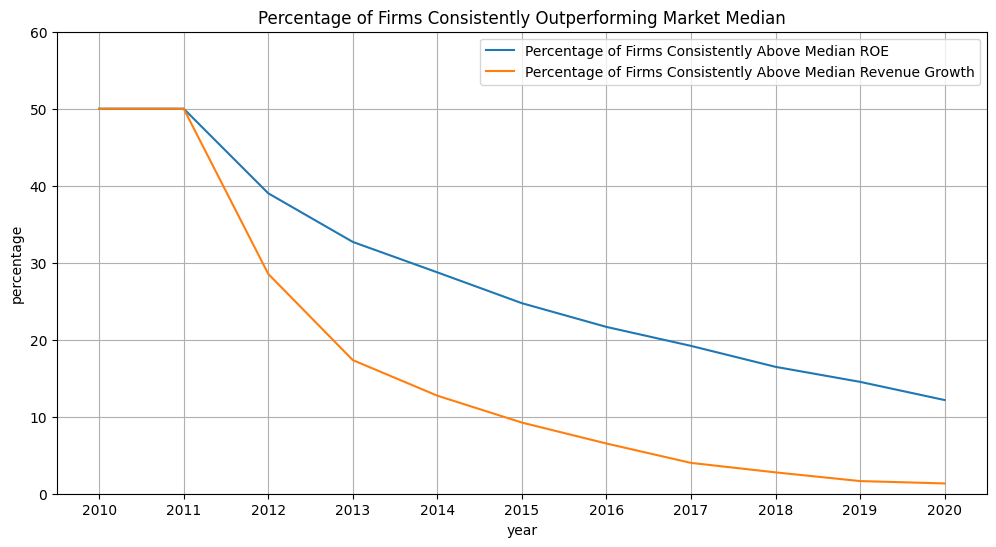

In [5]:
# Plot the results
plt.figure(figsize = (12, 6))
plt.plot(years, pct_above_median_roe, label = "Percentage of Firms Consistently Above Median ROE")
plt.plot(years, pct_above_growth_rate, label = "Percentage of Firms Consistently Above Median Revenue Growth")
plt.title("Percentage of Firms Consistently Outperforming Market Median")
plt.xlabel("year")
plt.ylabel("percentage")
plt.ylim(0, 60)  # Adjusted for full percentage scale
plt.xticks(years[0:])
plt.legend()
plt.grid(True)
# plt.show()